Campo eléctrico de referencia Er: [1 1]
Campo eléctrico incidente Eis: [1.        +0.j         0.92387953+0.38268343j]
Matriz de Jones S:
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]
Campo eléctrico después de la muestra Es: [0.70710678+0.70710678j 0.92387953-0.38268343j]


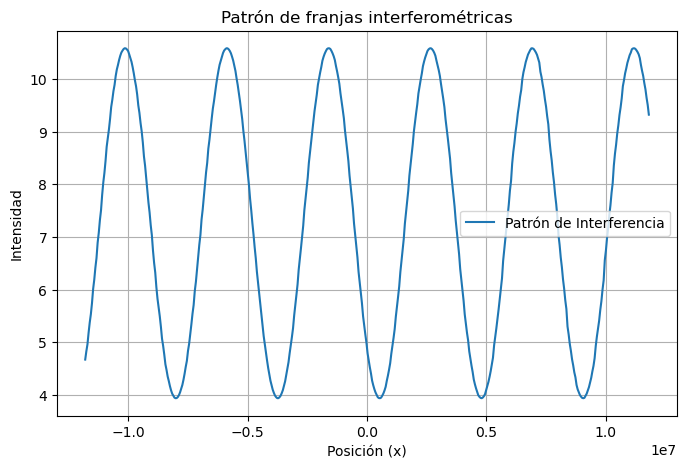

In [37]:
import numpy as np
import matplotlib.pyplot as plt


lambda_ = 532e-9  # Longitud de onda en metros (532 nm)
d = 0  # Grosor de la muestra en metros

# Campos eléctricos (en forma de vectores complejos)
Er = np.array([1, 1])  # Campo eléctrico de referencia
Eis = np.array([1, np.exp(1j * np.pi / 8)])  # Campo eléctrico incidente

# Cálculo de la birrefringencia y retardo de fase
#Delta_phi = (2 * np.pi * d / lambda_)  # Despeje de Delta_phi
Delta_phi = np.pi /2

# Matriz de Jones del objeto
S = np.array([[np.exp(1j * Delta_phi / 2), 0],
              [0, np.exp(-1j * Delta_phi / 2)]])

# Cálculo del campo eléctrico transmitido
Es = S @ Eis

# Cálculo del campo de salida
Eout = Er + Es

# Cálculo de intensidad detectada
I = np.abs(Eout[0])**2 + np.abs(Eout[1])**2

# Definición de variables para el patrón de interferencia
k = 2 * np.pi / lambda_  # Número de onda
x = np.linspace(-k, k, 500)  # Coordenada espacial
mu = 0  # Desfase global
vartheta = np.arctan2(-np.abs(Er[1]) * np.abs(Es[1]) * np.sin(Delta_phi),
                      np.abs(Er[0]) * np.abs(Es[0]) + np.abs(Er[1]) * np.abs(Es[1]) * np.cos(Delta_phi))

# Cálculo del patrón de interferencia
I_pattern = I + 2 * np.abs(Er[0] * Es[0] + Er[1] * Es[1]) * np.cos(mu + k * x - vartheta)

# Impresión de resultados
print("Campo eléctrico de referencia Er:", Er)
print("Campo eléctrico incidente Eis:", Eis)
print("Matriz de Jones S:")
print(S)
print("Campo eléctrico después de la muestra Es:", Es)

# Graficar el patrón de interferencia
plt.figure(figsize=(8, 5))
plt.plot(x, I_pattern, label='Patrón de Interferencia')
plt.xlabel("Posición (x)")
plt.ylabel("Intensidad")
plt.title("Patrón de franjas interferométricas")
plt.legend()
plt.grid()
plt.show()